<center><h1 style="color: purple; font-size: 80px;"><b><u>Simple Linear Regression</u></b></h1></center>

We can generate predictions using simple linear regression, a statistical technique for determining the connection between two variables. Typically, the two variables are written as y and x. X stands for the independent variable, or the variable that is utilised to predict the dependent variable. y stands for the dependent variable, often known as the result or output.

A line of best fit, or the regression line, will be generated by a straightforward linear regression model. You might be familiar with the idea of tracing the line of greatest fit through a data scatter plot. Consider a scatter plot that illustrates how years of experience impact earnings. Think of a line you may draw to indicate the pattern.

<img src = "https://github.com/avs-abhishek123/Machine-Learning/blob/main/images/sample_images/6772339_1608277678_simple.jpg?raw=true" alt ="6772339_1608277678_simple">

The simple linear regression equation we'll employ is presented here. The regression line's y-intercept (𝜷0), or where it will begin on the y-axis, is the constant. The slope and description of the link between the independent and dependent variables are provided by the beta coefficient (𝜷1). The amount of change in the dependent variable for each change in the independent variable of one unit is represented by the coefficient, which can be either positive or negative.

We'll be using salary data from Kaggle for this example. The information is divided into two columns: years of experience and the associated remuneration. You can get the data -[here](https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression).

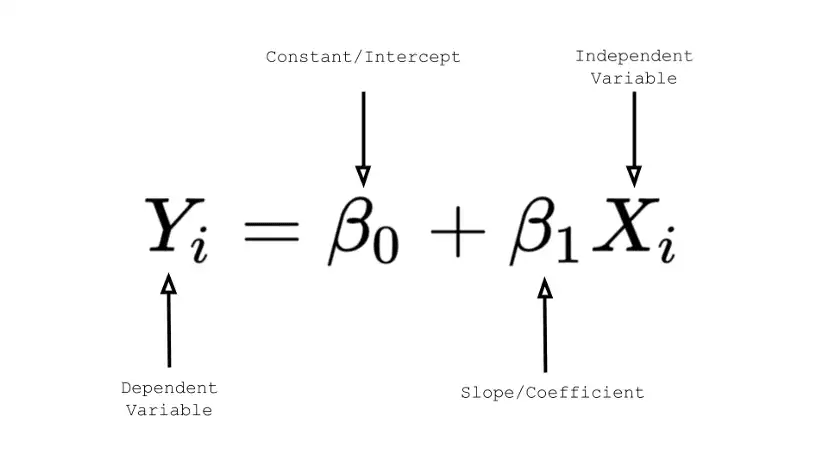

<hr style ="border: 10px solid purple; border-radius: 5px;">

The Python packages that we will require for this analysis will first be imported. NumPy, which assists with arithmetic computations, Pandas, which stores and manipulates data, and Matplotlib (optional), which allows for data plotting, are all that are required.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The data will then be loaded, and each column will then be assigned to the proper variable. In this example, the pay (y) will be the dependent variable and the years of experience will be the independent variable. We will use the years of experience to forecast the salary (x).

In [2]:
data = pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')
x = data['YearsExperience']
y = data['Salary']

We can use the.head() function offered by Pandas to view the data, which will display the top few rows of the data.

In [3]:
print(data.head())


   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


![](https://github.com/avs-abhishek123/Machine-Learning/blob/main/images/sample_images/regression_sample.png?raw=true)

A scatter plot depicting our data is shown above. Years of Experience and Salary show a positive linear association, indicating that as a person gets experience, they also earn more money.

<hr style ="border: 10px solid purple; border-radius: 5px;">

<h3 style="color: blue; font-size: 26px;">
    <b>
        <u>
            Making the Regression Line Calculation
        </u>
    </b>
</h3>

Fortunately, there are methods that we can use to quickly calculate the slope and intercept of the linear regression line even if we could spend all day estimating these values.

![](https://github.com/avs-abhishek123/Machine-Learning/blob/main/images/simple_linear_regression_eq2.png?raw=true)

We will apply the following formula to calculate the data's slope 𝜷1:

![](https://github.com/avs-abhishek123/Machine-Learning/blob/main/images/simple_linear_regression_eq3.png?raw=true)

We can use the following formula to calculate the intercept 𝜷0:

In order to calculate the regression line, we must now convert these two formulas into Python. I'll first demonstrate the entire function before going into more detail.

In [5]:
def linear_regression(x, y):     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))
    
    return (B0, B1, reg_line)

First, we will use the len() function to get the number of observations in our dataset and set this to the N variable. We can then calculate the mean for both X and Y by simply using the .mean() function.



In [6]:
N = len(x)
x_mean = x.mean()
y_mean = y.mean()

Now we can begin to calculate the slope 𝜷1. To shorten the length of these lines of code, we can calculate the numerator and denominator of the slope formula first then divide the numerator by the denominator and assign it to a variable named 𝜷1. We can just follow the slope formula given above.

In [7]:
B1_num = ((x - x_mean) * (y - y_mean)).sum()
B1_den = ((x - x_mean)**2).sum()
B1 = B1_num / B1_den

Now that we have calculated the slope 𝜷1, we can use the formula for the intercept 𝜷0.



In [8]:
B0 = y_mean - (B1 * x_mean)


Now if we apply this linear_regression() function to our data, it will return the intercept, slope and the regression line rounded to 3 decimal places.

Calculating How Well The Regression Line Fits
To determine how well our regression line fits the data, we want to calculate the correlation coefficient, commonly referred to just as R, and the coefficient of determination, otherwise known as R² (R squared).

- Coefficient of Determination (R²) — The percentage of variance explained by the independent variable (x) with values between 0 and 1. It cannot be negative because it is a square value. For example, if R² = 0.81, then this tells you that x explains 81% of the variance in y. Otherwise known as the “goodness of fit”.

- Correlation Coefficient (R) — The degree of relationship or correlation between two variables (x and y in this case). R can range from -1 to 1 with values equal to 1 meaning a perfect positive correlation and values equal to -1 meaning a perfect negative correlation.

Below is the formula for Pearson’s correlation coefficient:

![](https://github.com/avs-abhishek123/Machine-Learning/blob/main/images/Pearson%20Correlation%20Coefficient%20(R).png?raw=true)

This formula has to be converted into Python code. We only need to square Pearson's correlation coefficient once to obtain the coefficient of determination.

The number of observations (data rows) needs to be re-stored in the variable N. The numerator and denominator of the formula will now be separated into two separate pieces. The correlation coefficient can then be given.

In [9]:
def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

Applying these functions to our data, we can print out the results:



In [11]:
B0, B1, reg_line = linear_regression(x, y)
print('Regression Line: ', reg_line)
R = corr_coef(x, y)
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)


Regression Line:  y = 24848.2039665232 + 9449.962β

Correlation Coef.:  0.9782416184887616

"Goodness of Fit":  0.9569566641435118


<hr style ="border: 10px solid purple; border-radius: 5px;">


<h3 style="color: blue; font-size: 26px;">
    <b>
        <u>
            Plotting the Regression Line
        </u>
    </b>
</h3>

This part is completely optional and is just for fun.

Using Matplotlib, we can now plot our resulting regression line with our data.

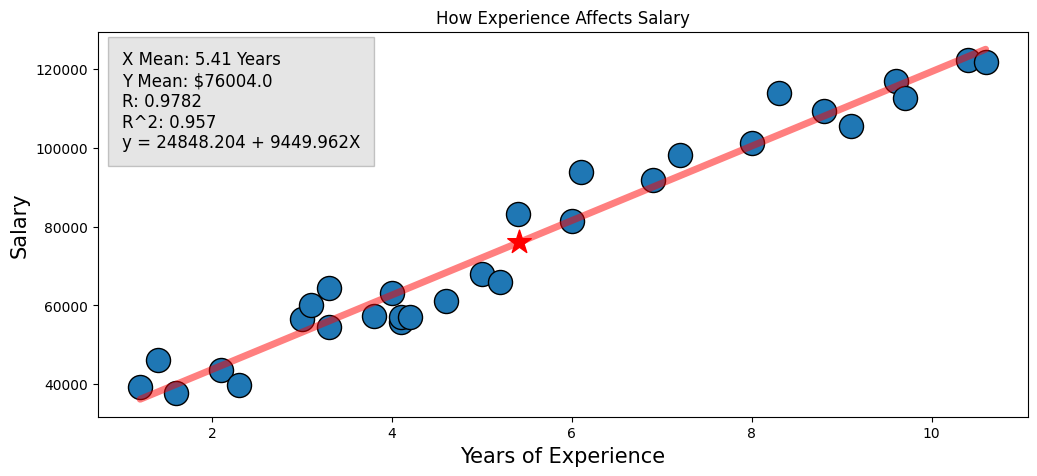

In [12]:
plt.figure(figsize=(12,5))
plt.scatter(x, y, s=300, linewidths=1, edgecolor='black')
text = '''X Mean: {} Years
Y Mean: ${}
R: {}
R^2: {}
y = {} + {}X'''.format(round(x.mean(), 2), 
                       round(y.mean(), 2), 
                       round(R, 4), 
                       round(R**2, 4),
                       round(B0, 3),
                       round(B1, 3))
plt.text(x=1, y=100000, s=text, fontsize=12, bbox={'facecolor': 'grey', 'alpha': 0.2, 'pad': 10})
plt.title('How Experience Affects Salary')
plt.xlabel('Years of Experience', fontsize=15)
plt.ylabel('Salary', fontsize=15)
plt.plot(x, B0 + B1*x, c = 'r', linewidth=5, alpha=.5, solid_capstyle='round')
plt.scatter(x=x.mean(), y=y.mean(), marker='*', s=10**2.5, c='r') # average point

Presently we can utilize our computations of the relapse line to make forecasts with new information that we run over. To make the anticipate() capability, we follow the equation for the straightforward direct relapse line and plug in the qualities that we determined as well as the new X worth. This capability will return the expectation y.


In [13]:
def predict(B0, B1, new_x):
    y = B0 + B1 * new_x
    return y

I trust this aided you learn or survey the course of basic straight relapse. Various straight relapse and polynomial relapse will be subjects I will address in later articles.